In [1]:
# authenticate with the google account used in console
from google.colab import auth
auth.authenticate_user()

In [2]:
#set project id code from bigquery project id
project_id = 'smiling-rhythm-380023'

In [3]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Run SQL Code to pull data from BigQuery

In [4]:
sqlEvents = '''
SELECT
  *
FROM
  `bigquery-public-data.thelook_ecommerce.events`
'''

sqlEventsPd = pd.io.gbq.read_gbq(sqlEvents,project_id=project_id,
                                      index_col='id')

In [5]:
#check column headers
sqlEventsPd.head(2)

,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
id,,,,,,,,,,,,
790015,60787,4,3184bed3-741a-45d9-8eb2-75f13b91961f,2022-10-08 07:42:25+00:00,57.129.231.251,Bogatynia,Dolnośląskie,59,Firefox,Organic,/cart,cart
152940,11824,3,c5c44c53-c2e0-43aa-9f65-7dfcddec6cc8,2023-02-04 21:53:24+00:00,155.136.3.119,Bogatynia,Dolnośląskie,59,Other,Email,/cart,cart


In [6]:
sqlOrderItems = '''
SELECT
  *
FROM
  `bigquery-public-data.thelook_ecommerce.order_items`
'''

sqlOrderItemsPd = pd.io.gbq.read_gbq(sqlOrderItems,project_id=project_id,
                                      index_col='id')

In [7]:
#add count column to track status column later
sqlOrderItemsPd['count'] = 1

In [8]:
sqlOrderItemsPd.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,count
id,,,,,,,,,,,
75713,52275,41829,13606,204495,Shipped,2023-03-26 02:34:05+00:00,2023-03-29 02:22:00+00:00,NaT,NaT,2.5,1
103479,71377,57213,13606,279368,Shipped,2023-04-04 13:58:37+00:00,2023-04-02 06:38:00+00:00,NaT,NaT,2.5,1
63235,43638,34774,13606,170721,Complete,2020-11-20 14:37:22+00:00,2020-11-23 17:08:00+00:00,2020-11-27 19:52:00+00:00,NaT,2.5,1
105541,72790,58330,13606,284943,Returned,2020-06-27 12:58:45+00:00,2020-06-28 14:46:00+00:00,2020-07-02 11:26:00+00:00,2020-07-03 23:27:00+00:00,2.5,1
44203,30542,24381,13606,119442,Cancelled,2021-03-01 09:16:55+00:00,NaT,NaT,NaT,2.5,1


In [9]:
sqlProducts = '''
SELECT
  *
FROM
  `bigquery-public-data.thelook_ecommerce.products`
'''

sqlProductsPd = pd.io.gbq.read_gbq(sqlProducts,project_id=project_id,
                                      index_col='id')

In [10]:
sqlProductsPd.tail()

,cost,category,name,brand,retail_price,department,sku,distribution_center_id
id,,,,,,,,
1993,22.150999,Fashion Hoodies & Sweatshirts,Comfort Colors C1598 Womens Full-Zip Hooded Fl...,Comfort Colors,52.119999,Women,C5A4E7E6882845EA7BB4D9462868219B,10
2062,18.973360,Fashion Hoodies & Sweatshirts,Comfort Colors Pigment-Dyed Ladies Full-Zip Ho...,Comfort Colors,39.860001,Women,2D405B367158E3F12D7C1E31A96B3AF3,10
2308,9.028020,Fashion Hoodies & Sweatshirts,Comfort Colors by Chouinard Women's Drawstring...,Comfort Colors,18.020000,Women,E58AEA67B01FA747687F038DFDE066F6,10
1852,17.674240,Fashion Hoodies & Sweatshirts,DV by Dolce Vita Women's Larisa Hooded Sweatshirt,DV by Dolce Vita,34.520000,Women,EB1E78328C46506B46A4AC4A1E378B91,10
2296,17.533261,Fashion Hoodies & Sweatshirts,Independent Trading Co Deluxe Fleece Zip Hoodie,Independent Trading Co,36.990002,Women,130F1A8E9E102707F3F91B010F151B0B,10


In [11]:
sqlProductsPd['name'].nunique()

27309

In [12]:
sqlInventoryItems = '''
SELECT
  *
FROM
  `bigquery-public-data.thelook_ecommerce.inventory_items`
'''

sqlInventoryItemsPd = pd.io.gbq.read_gbq(sqlInventoryItems,project_id=project_id,
                                      index_col='id')

In [13]:
sqlInventoryItemsPd['product_name'].nunique()

27252

###May change to sqlProductPd instead of sqlInventoryItemsPd. Looks to be a more complete list of products

In [14]:
#make columns that help describe the data
sqlInventoryItemsPd['profit'] = sqlInventoryItemsPd['product_retail_price'] - sqlInventoryItemsPd['cost']
sqlInventoryItemsPd['percent_profit'] = sqlInventoryItemsPd['cost'] / sqlInventoryItemsPd['product_retail_price']
sqlInventoryItemsPd.head()

,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,profit,percent_profit
id,,,,,,,,,,,,,
19853,16898,2023-03-15 19:28:43+00:00,2023-04-05 13:39:43+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,22811EE19846217512507785E74D12CC,3,11.075,0.557
19854,16898,2023-04-16 17:46:00+00:00,NaT,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,22811EE19846217512507785E74D12CC,3,11.075,0.557
19855,16898,2022-03-02 09:27:00+00:00,NaT,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,22811EE19846217512507785E74D12CC,3,11.075,0.557
19856,16898,2022-05-30 07:17:00+00:00,NaT,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,22811EE19846217512507785E74D12CC,3,11.075,0.557
268948,16898,2021-03-30 12:13:03+00:00,2021-04-18 11:12:03+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,22811EE19846217512507785E74D12CC,3,11.075,0.557


<Axes: title={'center': 'Profit Outliers'}, xlabel='profit'>

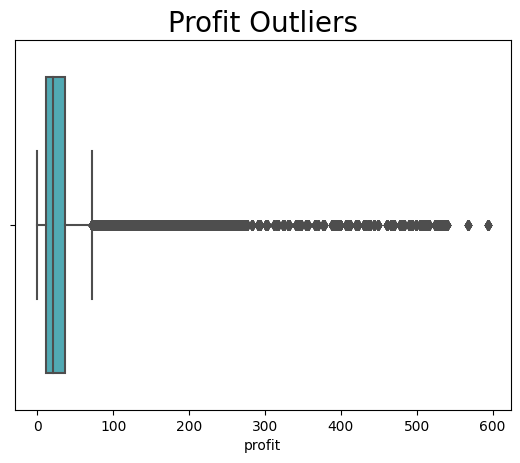

In [15]:
#check for outliers but only on contiuous numbers
plt.title("Profit Outliers", fontdict = {'fontsize': 20})
sns.boxplot(x=sqlInventoryItemsPd['profit'], palette = 'YlGnBu')

<Axes: title={'center': 'Percent Profit Outliers'}, xlabel='percent_profit'>

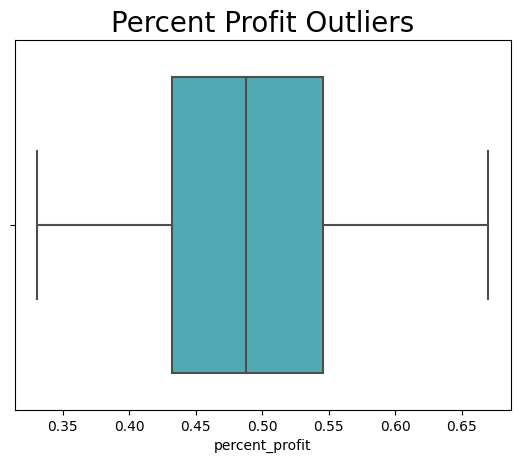

In [16]:
#check for outliers but only on contiuous numbers
plt.title("Percent Profit Outliers", fontdict = {'fontsize': 20})
sns.boxplot(x=sqlInventoryItemsPd['percent_profit'], palette = 'YlGnBu')

<Axes: title={'center': 'Cost Outliers'}, xlabel='cost'>

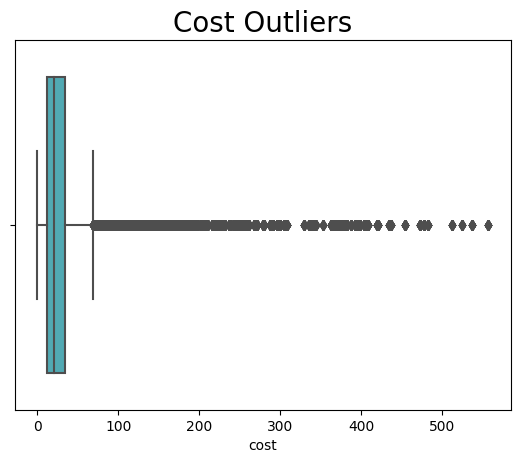

In [17]:
#check for outliers but only on contiuous numbers
plt.title("Cost Outliers", fontdict = {'fontsize': 20})
sns.boxplot(x=sqlInventoryItemsPd['cost'], palette = 'YlGnBu')

<Axes: title={'center': 'Retail Price Outliers'}, xlabel='product_retail_price'>

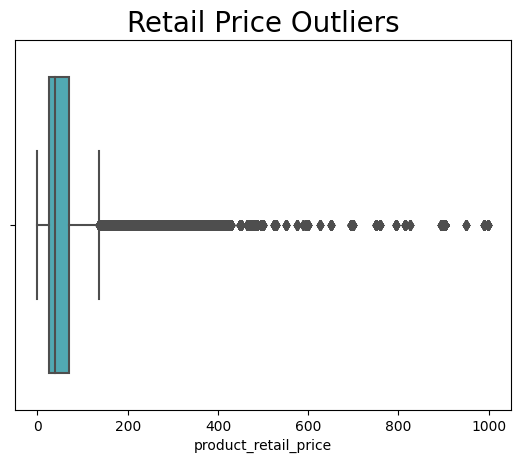

In [18]:
#check for outliers but only on contiuous numbers
plt.title("Retail Price Outliers", fontdict = {'fontsize': 20})
sns.boxplot(x=sqlInventoryItemsPd['product_retail_price'], palette = 'YlGnBu')

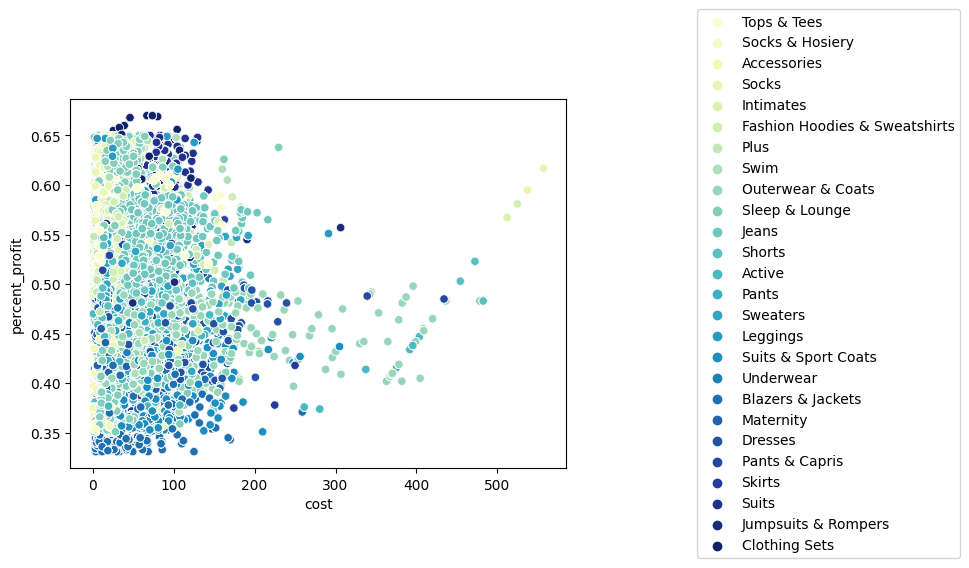

In [19]:
#cost verses profit in percent
cp = sns.scatterplot(data = sqlInventoryItemsPd,
                x = 'cost',
                y = 'percent_profit',
                palette = 'YlGnBu',
                hue = 'product_category')

cp.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

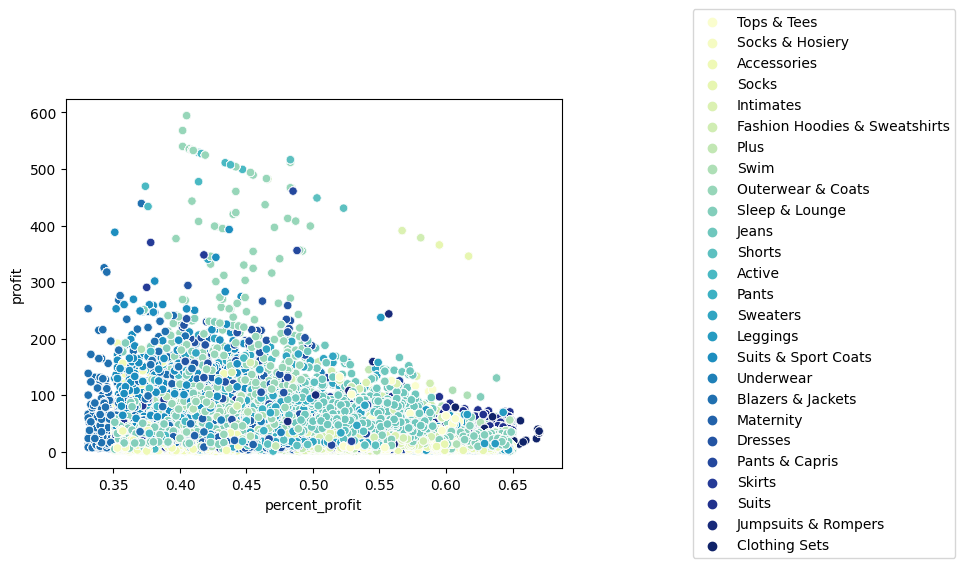

In [20]:
#dollar profit verses profit in percent
cp = sns.scatterplot(data = sqlInventoryItemsPd,
                x = 'percent_profit',
                y = 'profit',
                palette = 'YlGnBu',
                hue = 'product_category')

cp.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

### Checking the above box plots it seems that the profit margin seems to not have outliers and cost or profit dollar amount do not make a difference

In [21]:
sqlInventoryItemsPd.shape

(488638, 13)

In [22]:
sqlInventoryItemsPd['product_id'].nunique()

29054

In [23]:
#count unique
sqlOrderItemsPd['status'].nunique()

5

In [24]:
#status normalized 
status_counts = sqlOrderItemsPd['status'].value_counts(normalize=True).sort_values(ascending = True)

<Axes: >

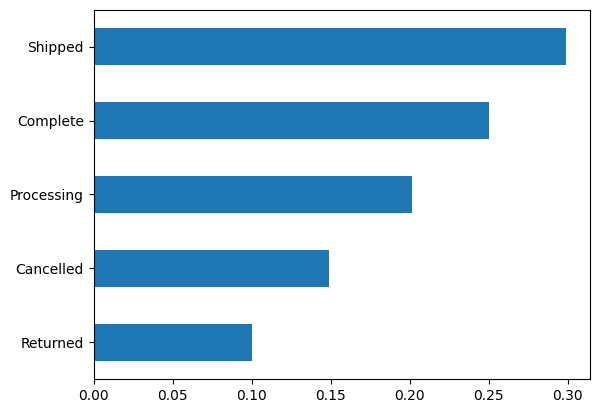

In [25]:
#normalized
status_counts[status_counts > 0.01].plot.barh()

In [26]:
#status not normalized
status_counts = sqlOrderItemsPd['status'].value_counts().sort_values(ascending = True)

<Axes: >

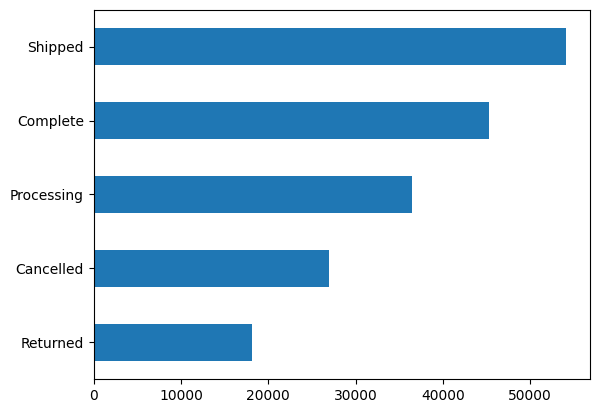

In [27]:
#not normalized
status_counts[status_counts > 0.01].plot.barh()

In [28]:
sqlOrderItemsPd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181061 entries, 75713 to 173461
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   order_id           181061 non-null  Int64              
 1   user_id            181061 non-null  Int64              
 2   product_id         181061 non-null  Int64              
 3   inventory_item_id  181061 non-null  Int64              
 4   status             181061 non-null  object             
 5   created_at         181061 non-null  datetime64[ns, UTC]
 6   shipped_at         117565 non-null  datetime64[ns, UTC]
 7   delivered_at       63438 non-null   datetime64[ns, UTC]
 8   returned_at        18098 non-null   datetime64[ns, UTC]
 9   sale_price         181061 non-null  float64            
 10  count              181061 non-null  int64              
dtypes: Int64(4), datetime64[ns, UTC](4), float64(1), int64(1), object(1)
memory usage: 17.4+ MB


In [29]:
sqlOrderItemsPd.groupby(['status']).count()['count']

status
Cancelled     27014
Complete      45340
Processing    36482
Returned      18098
Shipped       54127
Name: count, dtype: int64

In [30]:
sqlOrderItemsPd.groupby('status').count()

,order_id,user_id,product_id,inventory_item_id,created_at,shipped_at,delivered_at,returned_at,sale_price,count
status,,,,,,,,,,
Cancelled,27014,27014,27014,27014,27014,0,0,0,27014,27014
Complete,45340,45340,45340,45340,45340,45340,45340,0,45340,45340
Processing,36482,36482,36482,36482,36482,0,0,0,36482,36482
Returned,18098,18098,18098,18098,18098,18098,18098,18098,18098,18098
Shipped,54127,54127,54127,54127,54127,54127,0,0,54127,54127


In [31]:
sqlOrderItemsPd.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,count
id,,,,,,,,,,,
75713,52275,41829,13606,204495,Shipped,2023-03-26 02:34:05+00:00,2023-03-29 02:22:00+00:00,NaT,NaT,2.5,1
103479,71377,57213,13606,279368,Shipped,2023-04-04 13:58:37+00:00,2023-04-02 06:38:00+00:00,NaT,NaT,2.5,1
63235,43638,34774,13606,170721,Complete,2020-11-20 14:37:22+00:00,2020-11-23 17:08:00+00:00,2020-11-27 19:52:00+00:00,NaT,2.5,1
105541,72790,58330,13606,284943,Returned,2020-06-27 12:58:45+00:00,2020-06-28 14:46:00+00:00,2020-07-02 11:26:00+00:00,2020-07-03 23:27:00+00:00,2.5,1
44203,30542,24381,13606,119442,Cancelled,2021-03-01 09:16:55+00:00,NaT,NaT,NaT,2.5,1


In [32]:
#one hot encode status
status_dummy = pd.get_dummies(sqlOrderItemsPd['status'])
status_dummy

,Cancelled,Complete,Processing,Returned,Shipped
id,,,,,
75713,0,0,0,0,1
103479,0,0,0,0,1
63235,0,1,0,0,0
105541,0,0,0,1,0
44203,1,0,0,0,0
...,...,...,...,...,...
44229,0,0,0,0,1
104202,0,0,0,0,1
17606,0,1,0,0,0


In [33]:
#make product id index a column
status_dummy['id'] = status_dummy.index
status_dummy.head()

,Cancelled,Complete,Processing,Returned,Shipped,id
id,,,,,,
75713,0,0,0,0,1,75713
103479,0,0,0,0,1,103479
63235,0,1,0,0,0,63235
105541,0,0,0,1,0,105541
44203,1,0,0,0,0,44203


In [34]:
#reset index so I can merge df on  prouct_id column
status_dummy.reset_index(drop = True, inplace = True)
status_dummy.head()

,Cancelled,Complete,Processing,Returned,Shipped,id
0,0,0,0,0,1,75713
1,0,0,0,0,1,103479
2,0,1,0,0,0,63235
3,0,0,0,1,0,105541
4,1,0,0,0,0,44203


In [35]:
sqlOrderItemsPd.head()


,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,count
id,,,,,,,,,,,
75713,52275,41829,13606,204495,Shipped,2023-03-26 02:34:05+00:00,2023-03-29 02:22:00+00:00,NaT,NaT,2.5,1
103479,71377,57213,13606,279368,Shipped,2023-04-04 13:58:37+00:00,2023-04-02 06:38:00+00:00,NaT,NaT,2.5,1
63235,43638,34774,13606,170721,Complete,2020-11-20 14:37:22+00:00,2020-11-23 17:08:00+00:00,2020-11-27 19:52:00+00:00,NaT,2.5,1
105541,72790,58330,13606,284943,Returned,2020-06-27 12:58:45+00:00,2020-06-28 14:46:00+00:00,2020-07-02 11:26:00+00:00,2020-07-03 23:27:00+00:00,2.5,1
44203,30542,24381,13606,119442,Cancelled,2021-03-01 09:16:55+00:00,NaT,NaT,NaT,2.5,1


In [36]:
# merge status dummy with  orderitems
df_oi = pd.merge(sqlOrderItemsPd, status_dummy, how = 'inner', on = 'id')
df_oi.head()
df_oi.shape

(181061, 17)

In [37]:
df_oi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181061 entries, 0 to 181060
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   id                 181061 non-null  Int64              
 1   order_id           181061 non-null  Int64              
 2   user_id            181061 non-null  Int64              
 3   product_id         181061 non-null  Int64              
 4   inventory_item_id  181061 non-null  Int64              
 5   status             181061 non-null  object             
 6   created_at         181061 non-null  datetime64[ns, UTC]
 7   shipped_at         117565 non-null  datetime64[ns, UTC]
 8   delivered_at       63438 non-null   datetime64[ns, UTC]
 9   returned_at        18098 non-null   datetime64[ns, UTC]
 10  sale_price         181061 non-null  float64            
 11  count              181061 non-null  int64              
 12  Cancelled          181061 non-

In [38]:
df_oi.groupby('status').sum()

<ipython-input-38-3c4beead3f0e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_oi.groupby('status').sum()


,id,order_id,user_id,product_id,inventory_item_id,sale_price,count,Cancelled,Complete,Processing,Returned,Shipped
status,,,,,,,,,,,,
Cancelled,2464937839,1700252606,1361159585,415044654,6654506847,1.589162e+06,27014,27014,0,0,0,0
Complete,4097421628,2826297152,2262549421,697115598,11061728233,2.713988e+06,45340,0,45340,0,0,0
Processing,3299276758,2275769220,1821853118,554378752,8906982335,2.177151e+06,36482,0,0,36482,0,0
Returned,1652364333,1139757955,912434161,275029929,4460829765,1.087405e+06,18098,0,0,0,18098,0
Shipped,4877632833,3364480057,2693407631,829011647,13168068264,3.227913e+06,54127,0,0,0,0,54127


In [39]:
df_oi.groupby('product_id').sum()

<ipython-input-39-c9728619d179>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_oi.groupby('product_id').sum()


,id,order_id,user_id,inventory_item_id,sale_price,count,Cancelled,Complete,Processing,Returned,Shipped
product_id,,,,,,,,,,,
1,585368,403833,323019,1580343,294.000000,6,0,2,1,2,1
2,886329,611175,489226,2392300,556.000000,8,0,4,3,0,1
3,295780,204011,163372,798201,139.000000,2,0,0,0,1,1
4,262928,181346,145126,709608,324.000000,3,0,0,3,0,0
5,426284,294140,235229,1150904,564.000000,6,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
29116,1386827,956499,765689,3744015,1424.640030,14,2,5,2,3,2
29117,1006660,694387,556191,2717469,972.000000,9,0,2,2,1,4
29118,742759,512283,410057,2005015,880.000000,8,1,4,0,1,2


In [40]:
prodIdPd = df_oi.groupby('product_id').sum()
prodIdPd.head()

<ipython-input-40-e094a26cd6fb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prodIdPd = df_oi.groupby('product_id').sum()


,id,order_id,user_id,inventory_item_id,sale_price,count,Cancelled,Complete,Processing,Returned,Shipped
product_id,,,,,,,,,,,
1,585368,403833,323019,1580343,294.0,6,0,2,1,2,1
2,886329,611175,489226,2392300,556.0,8,0,4,3,0,1
3,295780,204011,163372,798201,139.0,2,0,0,0,1,1
4,262928,181346,145126,709608,324.0,3,0,0,3,0,0
5,426284,294140,235229,1150904,564.0,6,1,2,1,0,2


In [41]:
prodIdPd = prodIdPd[['Cancelled', 'Complete', 'Returned', 'Shipped', 'Processing', 'count']]
prodIdPd.tail()

,Cancelled,Complete,Returned,Shipped,Processing,count
product_id,,,,,,
29116,2,5,3,2,2,14
29117,0,2,1,4,2,9
29118,1,4,1,2,0,8
29119,0,2,0,0,1,3
29120,0,3,0,2,1,6


In [42]:
prodIdPd.describe()

,Cancelled,Complete,Returned,Shipped,Processing,count
count,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000
mean,0.929786,1.560542,0.622909,1.862979,1.255662,6.231879
std,0.974369,1.259979,0.786520,1.385513,1.116504,2.547824
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000
50%,1.000000,1.000000,0.000000,2.000000,1.000000,6.000000
75%,1.000000,2.000000,1.000000,3.000000,2.000000,8.000000
max,7.000000,9.000000,5.000000,9.000000,8.000000,20.000000


In [43]:
prodIdPd.sort_values('count', ascending = False)

,Cancelled,Complete,Returned,Shipped,Processing,count
product_id,,,,,,
23934,4,5,3,5,3,20
29007,2,8,1,6,2,19
17357,2,6,2,3,5,18
23073,2,5,1,2,7,17
24877,3,3,2,7,2,17
...,...,...,...,...,...,...
2812,0,0,0,0,1,1
13745,0,1,0,0,0,1
23582,0,1,0,0,0,1


In [44]:
#make product id index a column
prodIdPd['product_id'] = prodIdPd.index
prodIdPd.head()

,Cancelled,Complete,Returned,Shipped,Processing,count,product_id
product_id,,,,,,,
1,0,2,2,1,1,6,1
2,0,4,0,1,3,8,2
3,0,0,1,1,0,2,3
4,0,0,0,0,3,3,4
5,1,2,0,2,1,6,5


In [45]:
#reset index so I can merge df on  prouct_id column
prodIdPd.reset_index(drop = True, inplace = True)
prodIdPd.head()

,Cancelled,Complete,Returned,Shipped,Processing,count,product_id
0,0,2,2,1,1,6,1
1,0,4,0,1,3,8,2
2,0,0,1,1,0,2,3
3,0,0,0,0,3,3,4
4,1,2,0,2,1,6,5


In [46]:
prodIdPd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29054 entries, 0 to 29053
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Cancelled   29054 non-null  uint8
 1   Complete    29054 non-null  uint8
 2   Returned    29054 non-null  uint8
 3   Shipped     29054 non-null  uint8
 4   Processing  29054 non-null  uint8
 5   count       29054 non-null  int64
 6   product_id  29054 non-null  Int64
dtypes: Int64(1), int64(1), uint8(5)
memory usage: 624.3 KB


In [47]:
prodIdPd.sort_values(by='count', ascending = False)

,Cancelled,Complete,Returned,Shipped,Processing,count,product_id
23874,4,5,3,5,3,20,23934
28940,2,8,1,6,2,19,29007
17304,2,6,2,3,5,18,17357
23013,2,5,1,2,7,17,23073
24817,3,3,2,7,2,17,24877
...,...,...,...,...,...,...,...
2804,0,0,0,0,1,1,2812
13698,0,1,0,0,0,1,13745
23522,0,1,0,0,0,1,23582
10615,0,0,0,1,0,1,10648


<Axes: title={'center': 'Count Outliers'}, xlabel='count'>

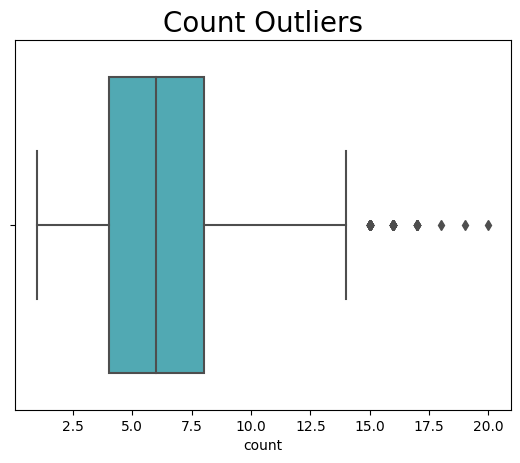

In [48]:
#check for outliers but only on contiuous numbers
plt.title("Count Outliers", fontdict = {'fontsize': 20})
sns.boxplot(x=prodIdPd['count'], palette = 'YlGnBu')

In [49]:
prodIdPd.head()

,Cancelled,Complete,Returned,Shipped,Processing,count,product_id
0,0,2,2,1,1,6,1
1,0,4,0,1,3,8,2
2,0,0,1,1,0,2,3
3,0,0,0,0,3,3,4
4,1,2,0,2,1,6,5


In [50]:
prodIdPd['product_id'].nunique()

29054

In [51]:
prodIdPd.shape

(29054, 7)

In [52]:
#drop duplicate product_id columns to prepare for merge
sqlInventoryItemsPd = sqlInventoryItemsPd.drop_duplicates(subset=['product_id'])


In [53]:
# merge count of status with product description
df = pd.merge(prodIdPd, sqlInventoryItemsPd, how = 'inner', on = 'product_id')
df.head()
#df.shape

,Cancelled,Complete,Returned,Shipped,Processing,count,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,profit,percent_profit
0,0,2,2,1,1,6,1,2023-01-17 08:33:45+00:00,2023-02-09 05:55:45+00:00,27.0480,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Seven7,49.0,Women,C4CA4238A0B923820DCC509A6F75849B,1,21.9520,0.552
1,0,4,0,1,3,8,2,2022-10-17 22:53:53+00:00,2022-12-04 15:21:53+00:00,36.6265,Tops & Tees,Calvin Klein Women's MSY Crew Neck Roll Sleeve,Calvin Klein,69.5,Women,C81E728D9D4C2F636F067F89CC14862C,3,32.8735,0.527
2,0,0,1,1,0,2,3,2023-02-18 17:14:38+00:00,2023-03-24 15:45:38+00:00,41.0050,Tops & Tees,Calvin Klein Jeans Women's Solid Flyaway Shirt,Calvin Klein Jeans,69.5,Women,ECCBC87E4B5CE2FE28308FD9F2A7BAF3,8,28.4950,0.590
3,0,0,0,0,3,3,4,2022-12-05 11:39:43+00:00,2022-12-09 02:54:43+00:00,57.1320,Tops & Tees,Bailey 44 Women's Undertow Top,Bailey 44,108.0,Women,A87FF679A2F3E71D9181A67B7542122C,6,50.8680,0.529
4,1,2,0,2,1,6,5,2023-02-15 16:08:01+00:00,2023-04-16 09:29:01+00:00,52.3580,Tops & Tees,Anne Klein Women's Plus-Size Button Front Blouse,Anne Klein,94.0,Women,E4DA3B7FBBCE2345D7772B0674A318D5,2,41.6420,0.557


In [54]:
df.describe()

,Cancelled,Complete,Returned,Shipped,Processing,count,product_id,cost,product_retail_price,product_distribution_center_id,profit,percent_profit
count,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.0,29054.000000,29054.000000,29054.0,29054.000000,29054.000000
mean,0.929786,1.560542,0.622909,1.862979,1.255662,6.231879,14566.027982,28.486581,59.231820,4.983135,30.745240,0.489197
std,0.974369,1.259979,0.786520,1.385513,1.116504,2.547824,8407.981845,30.641224,65.930339,2.901044,36.276096,0.071991
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.008300,0.020000,1.0,0.011700,0.331000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,7280.25,11.281055,24.000000,2.0,11.608785,0.432000
50%,1.000000,1.000000,0.000000,2.000000,1.000000,6.000000,14574.5,19.677646,39.990002,5.0,20.055575,0.488000
75%,1.000000,2.000000,1.000000,3.000000,2.000000,8.000000,21848.75,34.440833,69.949997,8.0,35.840000,0.545000
max,7.000000,9.000000,5.000000,9.000000,8.000000,20.000000,29120.0,557.151002,999.000000,10.0,594.404999,0.670000


### run check on count and status by making new column check

In [55]:
#run check on count and status by making new column check
df['statusCheck'] = df['Cancelled'] + df['Processing'] + df['Shipped'] + df['Returned'] + df['Complete'] - df['count']
df.head()

,Cancelled,Complete,Returned,Shipped,Processing,count,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,profit,percent_profit,statusCheck
0,0,2,2,1,1,6,1,2023-01-17 08:33:45+00:00,2023-02-09 05:55:45+00:00,27.0480,Tops & Tees,Seven7 Women's Long Sleeve Stripe Belted Top,Seven7,49.0,Women,C4CA4238A0B923820DCC509A6F75849B,1,21.9520,0.552,0
1,0,4,0,1,3,8,2,2022-10-17 22:53:53+00:00,2022-12-04 15:21:53+00:00,36.6265,Tops & Tees,Calvin Klein Women's MSY Crew Neck Roll Sleeve,Calvin Klein,69.5,Women,C81E728D9D4C2F636F067F89CC14862C,3,32.8735,0.527,0
2,0,0,1,1,0,2,3,2023-02-18 17:14:38+00:00,2023-03-24 15:45:38+00:00,41.0050,Tops & Tees,Calvin Klein Jeans Women's Solid Flyaway Shirt,Calvin Klein Jeans,69.5,Women,ECCBC87E4B5CE2FE28308FD9F2A7BAF3,8,28.4950,0.590,0
3,0,0,0,0,3,3,4,2022-12-05 11:39:43+00:00,2022-12-09 02:54:43+00:00,57.1320,Tops & Tees,Bailey 44 Women's Undertow Top,Bailey 44,108.0,Women,A87FF679A2F3E71D9181A67B7542122C,6,50.8680,0.529,0
4,1,2,0,2,1,6,5,2023-02-15 16:08:01+00:00,2023-04-16 09:29:01+00:00,52.3580,Tops & Tees,Anne Klein Women's Plus-Size Button Front Blouse,Anne Klein,94.0,Women,E4DA3B7FBBCE2345D7772B0674A318D5,2,41.6420,0.557,0


In [56]:
#check rows to maksure status check equals count
df.loc[df['statusCheck'] > 0]


,Cancelled,Complete,Returned,Shipped,Processing,count,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,profit,percent_profit,statusCheck


In [57]:
#make columns to distinguish sales not returned or cancelled 

df['notCancelledOrNotReturned'] = df['Complete'] + df['Processing'] + df['Shipped'] - df['Returned'] - df['Cancelled']
df['CancelledOrReturned'] = df['Returned'] + df['Cancelled']
df['profitInDollars'] = df['profit'] + df['notCancelledOrNotReturned']
df['cancelledAbove50Percent'] = df['CancelledOrReturned'] / df['notCancelledOrNotReturned']
df['50%CancelledBoolean'] = np.where(df['cancelledAbove50Percent'] >= .50, True, False)
df.head()

,Cancelled,Complete,Returned,Shipped,Processing,count,product_id,created_at,sold_at,cost,...,product_sku,product_distribution_center_id,profit,percent_profit,statusCheck,notCancelledOrNotReturned,CancelledOrReturned,profitInDollars,cancelledAbove50Percent,50%CancelledBoolean
0,0,2,2,1,1,6,1,2023-01-17 08:33:45+00:00,2023-02-09 05:55:45+00:00,27.0480,...,C4CA4238A0B923820DCC509A6F75849B,1,21.9520,0.552,0,2,2,23.9520,1.00,True
1,0,4,0,1,3,8,2,2022-10-17 22:53:53+00:00,2022-12-04 15:21:53+00:00,36.6265,...,C81E728D9D4C2F636F067F89CC14862C,3,32.8735,0.527,0,8,0,40.8735,0.00,False
2,0,0,1,1,0,2,3,2023-02-18 17:14:38+00:00,2023-03-24 15:45:38+00:00,41.0050,...,ECCBC87E4B5CE2FE28308FD9F2A7BAF3,8,28.4950,0.590,0,0,1,28.4950,inf,True
3,0,0,0,0,3,3,4,2022-12-05 11:39:43+00:00,2022-12-09 02:54:43+00:00,57.1320,...,A87FF679A2F3E71D9181A67B7542122C,6,50.8680,0.529,0,3,0,53.8680,0.00,False
4,1,2,0,2,1,6,5,2023-02-15 16:08:01+00:00,2023-04-16 09:29:01+00:00,52.3580,...,E4DA3B7FBBCE2345D7772B0674A318D5,2,41.6420,0.557,0,4,1,45.6420,0.25,False


array([[<Axes: title={'center': 'profitInDollars'}>]], dtype=object)

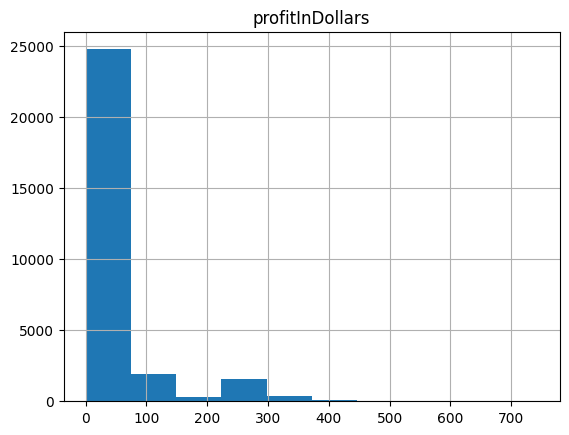

In [58]:
df.hist(column='profitInDollars')

array([[<Axes: title={'center': 'percent_profit'}>]], dtype=object)

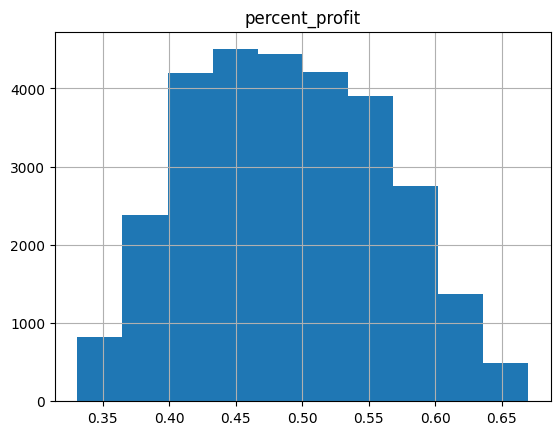

In [59]:
df.hist(column='percent_profit')

<Axes: xlabel='cost', ylabel='Density'>

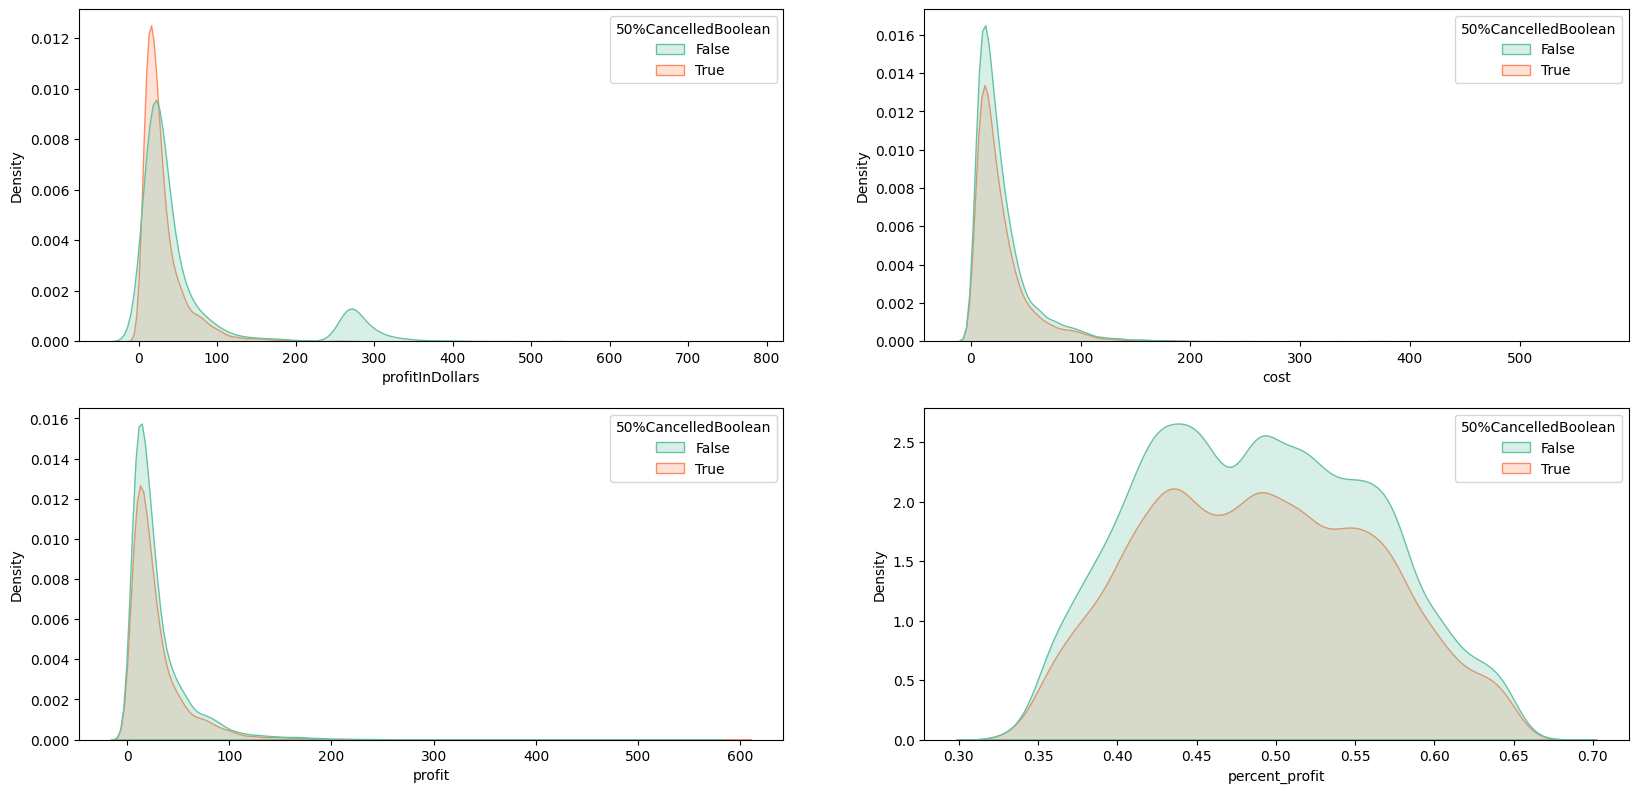

In [60]:
#looking to see if cancelled or returned items are more frequent with less or more profitable or costly items

plt.figure(figsize = (20, 25))
plt.subplot(5,2,3)
sns.kdeplot(x='profit', hue='50%CancelledBoolean', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='percent_profit', hue='50%CancelledBoolean', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,1)
sns.kdeplot(x='profitInDollars', hue='50%CancelledBoolean', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,2)
sns.kdeplot(x = 'cost', hue = '50%CancelledBoolean', palette = 'Set2', fill=True, data = df)

In [61]:
#split profitInDollars into 5 bins
bin_labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']
df['profitInDollarsGroups'] = pd.qcut(df['profitInDollars'], 
                                      5,
                                      labels = bin_labels)
df.head()

,Cancelled,Complete,Returned,Shipped,Processing,count,product_id,created_at,sold_at,cost,...,product_distribution_center_id,profit,percent_profit,statusCheck,notCancelledOrNotReturned,CancelledOrReturned,profitInDollars,cancelledAbove50Percent,50%CancelledBoolean,profitInDollarsGroups
0,0,2,2,1,1,6,1,2023-01-17 08:33:45+00:00,2023-02-09 05:55:45+00:00,27.0480,...,1,21.9520,0.552,0,2,2,23.9520,1.00,True,41-60%
1,0,4,0,1,3,8,2,2022-10-17 22:53:53+00:00,2022-12-04 15:21:53+00:00,36.6265,...,3,32.8735,0.527,0,8,0,40.8735,0.00,False,61-80%
2,0,0,1,1,0,2,3,2023-02-18 17:14:38+00:00,2023-03-24 15:45:38+00:00,41.0050,...,8,28.4950,0.590,0,0,1,28.4950,inf,True,41-60%
3,0,0,0,0,3,3,4,2022-12-05 11:39:43+00:00,2022-12-09 02:54:43+00:00,57.1320,...,6,50.8680,0.529,0,3,0,53.8680,0.00,False,61-80%
4,1,2,0,2,1,6,5,2023-02-15 16:08:01+00:00,2023-04-16 09:29:01+00:00,52.3580,...,2,41.6420,0.557,0,4,1,45.6420,0.25,False,61-80%


<ipython-input-62-3e4282ed7bd1>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="profitInDollarsGroups", y="notCancelledOrNotReturned", hue="50%CancelledBoolean", data=df, ci=None);


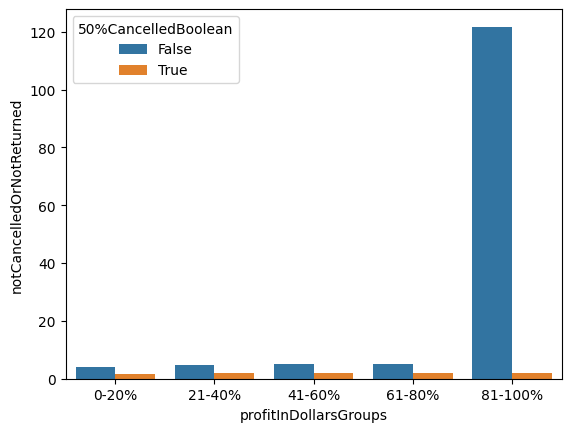

In [62]:
sns.barplot(x="profitInDollarsGroups", y="notCancelledOrNotReturned", hue="50%CancelledBoolean", data=df, ci=None);

<ipython-input-63-95e591230d06>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby('profitInDollarsGroups').sum()
<ipython-input-63-95e591230d06>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="profitInDollarsGroups", y="profitInDollars", data=df2, ci=None);


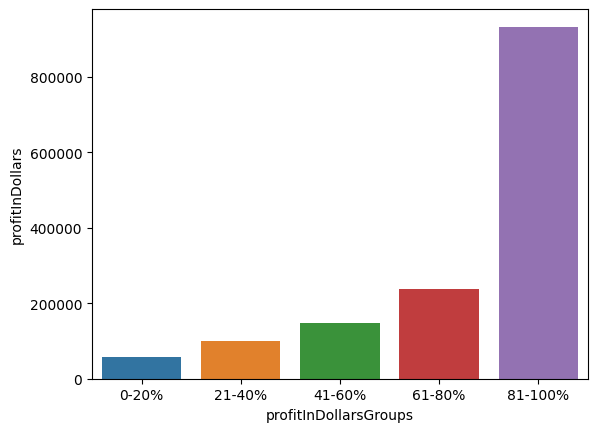

In [63]:
# Gropup by profit in dollars
df2 = df.groupby('profitInDollarsGroups').sum()
#df2['profitInDollarsGroups'] = df2.index
df2 = df2.reset_index()
#df2
#sns.barplot(x="profitInDollarsGroups", y="profitInDollars", hue="50%CancelledBoolean", data=df2, ci=None);
sns.barplot(x="profitInDollarsGroups", y="profitInDollars", data=df2, ci=None);

### remove items from the bin that represents 0-20% profit in dollars

### The lowest profit in total dollar amount also have the highest cancellation which adds extra cost 


# I would actually look into removing the bottom 0% to 60% given the graph above.

In [64]:
dfRemoveItems = df.loc[df['profitInDollarsGroups'] == '0-20%']
productsToRemove = dfRemoveItems['product_id']
productsToRemove

17          18
18          19
100        102
103        105
107        109
         ...  
29028    29095
29031    29098
29034    29101
29045    29112
29046    29113
Name: product_id, Length: 5811, dtype: Int64

In [65]:
#save csv list of prodcuts to remove 
productsToRemove.to_csv('productsToRemove_Final.csv', index = False)

In [66]:
sqlUsers = '''
SELECT
  *
FROM
  `bigquery-public-data.thelook_ecommerce.users`
'''

sqlUsersPd = pd.io.gbq.read_gbq(sqlUsers,project_id=project_id,
                                      index_col='id')

In [67]:
sqlUsersPd.head(10)

,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
id,,,,,,,,,,,,,,
9884,Colleen,Ward,colleenward@example.org,48,F,Mie,249 Joseph Circle,513-0836,Suzuka City,Japan,34.851814,136.508713,Search,2022-08-23 11:40:00+00:00
12266,Kathleen,Cruz,kathleencruz@example.net,26,F,Mie,388 Eric Forest Apt. 148,513-0836,Suzuka City,Japan,34.851814,136.508713,Search,2021-02-13 12:16:00+00:00
1633,Leroy,Schneider,leroyschneider@example.org,31,M,Acre,9044 Andrade Road,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2020-11-24 17:13:00+00:00
26151,Earl,Miller,earlmiller@example.net,30,M,Acre,62069 Rubio Garden,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-06-30 14:52:00+00:00
31507,Gerald,Wyatt,geraldwyatt@example.org,69,M,Acre,9331 Schwartz Bypass Suite 042,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2020-02-07 00:42:00+00:00
38055,Andrew,Scott,andrewscott@example.com,42,M,Acre,45907 Melissa Harbor Suite 033,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Email,2020-09-03 16:35:00+00:00
64396,Joshua,Young,joshuayoung@example.net,56,M,Acre,11520 Haynes Passage Suite 244,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-12-11 18:15:00+00:00
98099,Brett,Smith,brettsmith@example.net,30,M,Acre,5303 Clark Manors Suite 721,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Organic,2019-08-18 06:59:00+00:00
122,Pedro,Spencer,pedrospencer@example.org,70,M,Acre,450 Nicholas Knolls Suite 392,69940-000,Sena Madureira,Brasil,-9.857324,-69.437057,Search,2019-09-17 05:48:00+00:00


In [68]:
#create boolean for male/female
sqlUsersPd['isMan'] = np.where(sqlUsersPd['gender'] == 'M', True, False)

In [69]:
#dummy encode traffic source & country
countryDummy = pd.get_dummies(sqlUsersPd['country'])
countryDummy

,Australia,Austria,Belgium,Brasil,China,Colombia,Deutschland,España,France,Germany,Japan,Poland,South Korea,Spain,United Kingdom,United States
id,,,,,,,,,,,,,,,,
9884,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12266,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1633,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
26151,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
31507,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96677,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19551,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
41676,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [70]:
#dummy encode traffic source & country
trafficDummy = pd.get_dummies(sqlUsersPd['traffic_source'])
trafficDummy

,Display,Email,Facebook,Organic,Search
id,,,,,
9884,0,0,0,0,1
12266,0,0,0,0,1
1633,0,0,0,0,1
26151,0,0,0,0,1
31507,0,0,0,0,1
...,...,...,...,...,...
96677,0,0,0,0,1
19551,0,1,0,0,0
41676,0,0,0,0,1


In [71]:
#split profitInDollars into 6 bins using cut not qcut
bin_labels = [ '<18', '19-24', '25-34', '35-44', '45-64', '65+']
sqlUsersPd['ageGroups'] = pd.cut(sqlUsersPd['age'], 
                                      bins = [0,19,25,35,45,65,200],
                                      labels = bin_labels)
sqlUsersPd.head()

,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,isMan,ageGroups
id,,,,,,,,,,,,,,,,
9884,Colleen,Ward,colleenward@example.org,48,F,Mie,249 Joseph Circle,513-0836,Suzuka City,Japan,34.851814,136.508713,Search,2022-08-23 11:40:00+00:00,False,45-64
12266,Kathleen,Cruz,kathleencruz@example.net,26,F,Mie,388 Eric Forest Apt. 148,513-0836,Suzuka City,Japan,34.851814,136.508713,Search,2021-02-13 12:16:00+00:00,False,25-34
1633,Leroy,Schneider,leroyschneider@example.org,31,M,Acre,9044 Andrade Road,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2020-11-24 17:13:00+00:00,True,25-34
26151,Earl,Miller,earlmiller@example.net,30,M,Acre,62069 Rubio Garden,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-06-30 14:52:00+00:00,True,25-34
31507,Gerald,Wyatt,geraldwyatt@example.org,69,M,Acre,9331 Schwartz Bypass Suite 042,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2020-02-07 00:42:00+00:00,True,65+


In [72]:
#merge all dummy and normalized data
dfPart2 = pd.merge(sqlUsersPd, trafficDummy, how = 'inner', on = 'id')
dfPart2 = pd.merge(dfPart2, countryDummy, how = 'inner', on = 'id')
#dfPart2.info()

In [73]:
dfPart3 = pd.merge(sqlOrderItemsPd, dfPart2, how = 'inner', left_on = 'user_id', right_on = 'id')
dfPart3
#sqlOrderItemsPd

,order_id,user_id,product_id,inventory_item_id,status,created_at_x,shipped_at,delivered_at,returned_at,sale_price,...,Deutschland,España,France,Germany,Japan,Poland,South Korea,Spain,United Kingdom,United States
0,52275,41829,13606,204495,Shipped,2023-03-26 02:34:05+00:00,2023-03-29 02:22:00+00:00,NaT,NaT,2.500000,...,0,0,0,0,0,0,0,0,0,0
1,52276,41829,15500,204508,Shipped,2023-03-30 01:40:56+00:00,2023-03-30 10:34:00+00:00,NaT,NaT,25.000000,...,0,0,0,0,0,0,0,0,0,0
2,52276,41829,15955,204502,Shipped,2023-04-02 05:09:26+00:00,2023-03-30 10:34:00+00:00,NaT,NaT,36.990002,...,0,0,0,0,0,0,0,0,0,0
3,52276,41829,4366,204505,Shipped,2023-04-03 03:01:21+00:00,2023-03-30 10:34:00+00:00,NaT,NaT,36.990002,...,0,0,0,0,0,0,0,0,0,0
4,52276,41829,13263,204498,Shipped,2023-04-01 02:04:00+00:00,2023-03-30 10:34:00+00:00,NaT,NaT,85.949997,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181056,38311,30509,417,150043,Shipped,2022-05-27 11:46:05+00:00,2022-05-28 00:37:00+00:00,NaT,NaT,8.820000,...,0,0,0,0,0,0,0,0,0,1
181057,41099,32784,417,160875,Complete,2021-10-10 02:53:29+00:00,2021-10-10 04:57:00+00:00,2021-10-14 14:08:00+00:00,NaT,8.820000,...,0,0,0,0,0,0,0,0,0,0
181058,5445,4367,6992,21282,Processing,2022-07-07 06:51:54+00:00,NaT,NaT,NaT,8.820000,...,0,0,0,0,0,0,1,0,0,0
181059,27338,21879,3633,106868,Complete,2023-03-02 05:23:44+00:00,2023-03-03 06:27:00+00:00,2023-03-03 21:56:00+00:00,NaT,9.320000,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#check out columns for kmean
dfPart3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181061 entries, 0 to 181060
Data columns (total 48 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   order_id           181061 non-null  Int64              
 1   user_id            181061 non-null  Int64              
 2   product_id         181061 non-null  Int64              
 3   inventory_item_id  181061 non-null  Int64              
 4   status             181061 non-null  object             
 5   created_at_x       181061 non-null  datetime64[ns, UTC]
 6   shipped_at         117565 non-null  datetime64[ns, UTC]
 7   delivered_at       63438 non-null   datetime64[ns, UTC]
 8   returned_at        18098 non-null   datetime64[ns, UTC]
 9   sale_price         181061 non-null  float64            
 10  count              181061 non-null  int64              
 11  first_name         181061 non-null  object             
 12  last_name          181061 non-

In [75]:
#dummy encode status
status1Dummy = pd.get_dummies(dfPart3['status'])
status1Dummy

,Cancelled,Complete,Processing,Returned,Shipped
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
181056,0,0,0,0,1
181057,0,1,0,0,0
181058,0,0,1,0,0
181059,0,1,0,0,0


In [76]:
ageGroupDummy = pd.get_dummies(dfPart3['ageGroups'])
ageGroupDummy

,<18,19-24,25-34,35-44,45-64,65+
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
181056,0,0,0,0,1,0
181057,0,0,0,0,1,0
181058,0,0,1,0,0,0
181059,1,0,0,0,0,0


In [77]:
#merge all dummy again

# Merge two DataFrames by index using pandas.merge()
dfPart3 = pd.merge(dfPart3, status1Dummy, left_index=True, right_index=True)
dfPart3 = pd.merge(dfPart3, ageGroupDummy, left_index=True, right_index=True)

dfPart3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181061 entries, 0 to 181060
Data columns (total 59 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   order_id           181061 non-null  Int64              
 1   user_id            181061 non-null  Int64              
 2   product_id         181061 non-null  Int64              
 3   inventory_item_id  181061 non-null  Int64              
 4   status             181061 non-null  object             
 5   created_at_x       181061 non-null  datetime64[ns, UTC]
 6   shipped_at         117565 non-null  datetime64[ns, UTC]
 7   delivered_at       63438 non-null   datetime64[ns, UTC]
 8   returned_at        18098 non-null   datetime64[ns, UTC]
 9   sale_price         181061 non-null  float64            
 10  count              181061 non-null  int64              
 11  first_name         181061 non-null  object             
 12  last_name          181061 non-

In [78]:
dfPart3.columns

Index(['order_id', 'user_id', 'product_id', 'inventory_item_id', 'status',
       'created_at_x', 'shipped_at', 'delivered_at', 'returned_at',
       'sale_price', 'count', 'first_name', 'last_name', 'email', 'age',
       'gender', 'state', 'street_address', 'postal_code', 'city', 'country',
       'latitude', 'longitude', 'traffic_source', 'created_at_y', 'isMan',
       'ageGroups', 'Display', 'Email', 'Facebook', 'Organic', 'Search',
       'Australia', 'Austria', 'Belgium', 'Brasil', 'China', 'Colombia',
       'Deutschland', 'España', 'France', 'Germany', 'Japan', 'Poland',
       'South Korea', 'Spain', 'United Kingdom', 'United States', 'Cancelled',
       'Complete', 'Processing', 'Returned', 'Shipped', '<18', '19-24',
       '25-34', '35-44', '45-64', '65+'],
      dtype='object')

In [79]:
dfPart3.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at_x,shipped_at,delivered_at,returned_at,sale_price,...,Complete,Processing,Returned,Shipped,<18,19-24,25-34,35-44,45-64,65+
0,52275,41829,13606,204495,Shipped,2023-03-26 02:34:05+00:00,2023-03-29 02:22:00+00:00,NaT,NaT,2.500000,...,0,0,0,1,1,0,0,0,0,0
1,52276,41829,15500,204508,Shipped,2023-03-30 01:40:56+00:00,2023-03-30 10:34:00+00:00,NaT,NaT,25.000000,...,0,0,0,1,1,0,0,0,0,0
2,52276,41829,15955,204502,Shipped,2023-04-02 05:09:26+00:00,2023-03-30 10:34:00+00:00,NaT,NaT,36.990002,...,0,0,0,1,1,0,0,0,0,0
3,52276,41829,4366,204505,Shipped,2023-04-03 03:01:21+00:00,2023-03-30 10:34:00+00:00,NaT,NaT,36.990002,...,0,0,0,1,1,0,0,0,0,0
4,52276,41829,13263,204498,Shipped,2023-04-01 02:04:00+00:00,2023-03-30 10:34:00+00:00,NaT,NaT,85.949997,...,0,0,0,1,1,0,0,0,0,0


In [80]:
X = dfPart3[['isMan', 'Display', 'Email', 'Facebook', 'Organic', 'Search',
       'Australia', 'Austria', 'Belgium', 'Brasil', 'China', 'Colombia',
       'Deutschland', 'España', 'France', 'Germany', 'Japan', 'Poland',
       'South Korea', 'Spain', 'United Kingdom', 'United States',
       'Cancelled', 'Complete', 'Processing', 'Returned', 'Shipped',
       '<18', '19-24', '25-34', '35-44', '45-64', '65+']]

In [81]:
df = X
df.head()

,isMan,Display,Email,Facebook,Organic,Search,Australia,Austria,Belgium,Brasil,...,Complete,Processing,Returned,Shipped,<18,19-24,25-34,35-44,45-64,65+
0,False,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,False,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
2,False,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,False,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,False,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

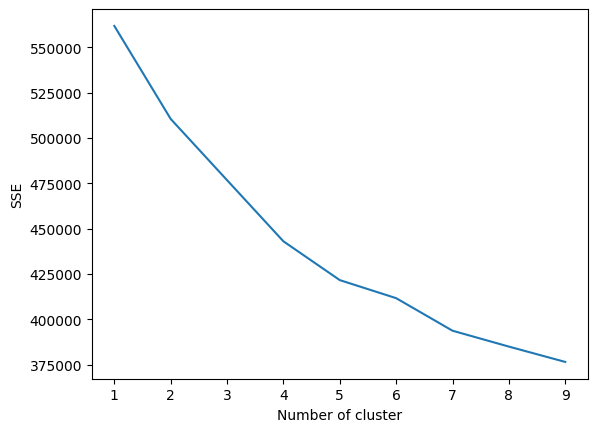

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(X)
    #user_all["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [83]:
#above graph has a nice elbow at 6 clusters
kmeans = KMeans(n_clusters=6, max_iter=1000).fit(X)
X["clusters"] = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-83-9583669f3ef1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["clusters"] = kmeans.labels_


In [84]:
cluster_means = X.groupby('clusters').mean()

In [85]:
cluster_means

,isMan,Display,Email,Facebook,Organic,Search,Australia,Austria,Belgium,Brasil,...,Complete,Processing,Returned,Shipped,<18,19-24,25-34,35-44,45-64,65+
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.507234,0.038906,0.048500,0.061138,0.158624,0.692832,0.020865,0.000000,0.011998,0.142038,...,1.0,0.000000,0.0000,0.000000,0.133017,0.104235,0.173776,0.170798,0.335090,0.083083
1,0.495941,0.048323,0.058414,0.068086,0.000000,0.825177,0.020830,0.000065,0.013423,0.144678,...,0.0,1.000000,0.0000,0.000000,0.133195,0.101562,0.169324,0.169195,0.341657,0.085066
2,0.497083,0.050475,0.058931,0.072566,0.000000,0.818027,0.021173,0.000000,0.012062,0.146640,...,0.0,0.000000,1.0000,0.000000,0.137135,0.101606,0.172271,0.163094,0.342838,0.083055
3,0.498103,0.000000,0.000000,0.000000,0.000000,1.000000,0.020508,0.000080,0.011753,0.148277,...,0.0,0.000000,0.0000,1.000000,0.133314,0.101770,0.172764,0.168864,0.335394,0.087894
4,0.504849,0.046405,0.059540,0.072239,0.000000,0.821815,0.022181,0.000087,0.012134,0.145131,...,0.0,0.000000,0.0000,0.000000,0.133345,0.105554,0.171487,0.167790,0.339538,0.082286
5,0.503828,0.076950,0.094550,0.119530,0.708970,0.000000,0.021654,0.000000,0.013166,0.144753,...,0.0,0.192807,0.0985,0.569379,0.136299,0.099227,0.175034,0.170599,0.333472,0.085369


In [86]:
X.mean()

isMan             0.501704
Display           0.040406
Email             0.049718
Facebook          0.061278
Organic           0.152739
Search            0.695859
Australia         0.021103
Austria           0.000039
Belgium           0.012399
Brasil            0.145001
China             0.340338
Colombia          0.000149
Deutschland       0.000006
España            0.000028
France            0.046056
Germany           0.039998
Japan             0.025997
Poland            0.002231
South Korea       0.053816
Spain             0.040473
United Kingdom    0.046266
United States     0.226101
Cancelled         0.149198
Complete          0.250413
Processing        0.201490
Returned          0.099955
Shipped           0.298943
<18               0.134021
19-24             0.102413
25-34             0.172588
35-44             0.169059
45-64             0.337234
65+               0.084684
clusters          2.268810
dtype: float64

In [87]:
percent_diff = cluster_means/X.mean()-1
percent_diff = percent_diff.T

In [88]:
#important to use random seed or this will get jacked
print(percent_diff.to_string())

clusters               0         1         2         3         4         5
19-24           0.017788 -0.008307 -0.007880 -0.006283  0.030669 -0.031106
25-34           0.006882 -0.018912 -0.001836  0.001019 -0.006381  0.014170
35-44           0.010289  0.000804 -0.035283 -0.001152 -0.007505  0.009109
45-64          -0.006358  0.013113  0.016618 -0.005458  0.006831 -0.011157
65+            -0.018903  0.004514 -0.019241  0.037907 -0.028320  0.008085
<18            -0.007491 -0.006162  0.023237 -0.005277 -0.005045  0.016997
Australia      -0.011316 -0.012956  0.003317 -0.028223  0.051048  0.026092
Austria        -1.000000  0.673245 -1.000000  1.058673  1.249890 -1.000000
Belgium        -0.032333  0.082578 -0.027221 -0.052124 -0.021373  0.061819
Brasil         -0.020434 -0.002229  0.011307  0.022593  0.000898 -0.001711
Cancelled      -1.000000 -1.000000 -1.000000 -1.000000  5.702488 -0.066254
China          -0.010106 -0.003064 -0.014997  0.010339  0.004166  0.010263
Colombia        0.479039 

In [89]:
cluster_names = {0:'People that love to cancel their orders; majority from austria',
                 1:'People from USA that dont return or cancel items',
                 2:'People who return everything',
                 3:'People with orders processing',
                 4:'People with orders shipped and dont cancel',
                 5:'People with completed orders form Gremany and Spain'
                 }

In [90]:
X_Clusters = X['clusters'].replace(cluster_names)
X_Clusters

0         People with completed orders form Gremany and ...
1         People with completed orders form Gremany and ...
2         People with completed orders form Gremany and ...
3         People with completed orders form Gremany and ...
4         People with completed orders form Gremany and ...
                                ...                        
181056    People with completed orders form Gremany and ...
181057    People that love to cancel their orders; major...
181058     People from USA that dont return or cancel items
181059    People that love to cancel their orders; major...
181060                        People with orders processing
Name: clusters, Length: 181061, dtype: object

In [91]:
#check to make sure amt of rows match
#Merge cluster column with User_id
print(dfPart3.shape)
print(X.shape)

(181061, 59)
(181061, 34)


In [92]:
#merge user_id and clusters
tempDF = pd.merge(dfPart3, X_Clusters, left_index=True, right_index=True)
tempDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 181061 entries, 0 to 181060
Data columns (total 60 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   order_id           181061 non-null  Int64              
 1   user_id            181061 non-null  Int64              
 2   product_id         181061 non-null  Int64              
 3   inventory_item_id  181061 non-null  Int64              
 4   status             181061 non-null  object             
 5   created_at_x       181061 non-null  datetime64[ns, UTC]
 6   shipped_at         117565 non-null  datetime64[ns, UTC]
 7   delivered_at       63438 non-null   datetime64[ns, UTC]
 8   returned_at        18098 non-null   datetime64[ns, UTC]
 9   sale_price         181061 non-null  float64            
 10  count              181061 non-null  int64              
 11  first_name         181061 non-null  object             
 12  last_name          181061 non-

In [93]:
userId_Clusters = tempDF[['user_id', 'clusters']]
print(userId_Clusters.shape)
userId_Clusters.head()

(181061, 2)


,user_id,clusters
0,41829,People with completed orders form Gremany and ...
1,41829,People with completed orders form Gremany and ...
2,41829,People with completed orders form Gremany and ...
3,41829,People with completed orders form Gremany and ...
4,41829,People with completed orders form Gremany and ...


In [94]:
#save csv list of user ids and cluster names 
userId_Clusters.to_csv('userId_Clusters.csv', index = False)